# SPEECH TO TEXT

In [1]:
!pip install transformers

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score,precision_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from tokenizers import (
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
    Tokenizer,
)
import pickle

import gc
import warnings
warnings.filterwarnings("ignore")
import soundfile as sf
import torch
from transformers import AutoProcessor, AutoModelForCTC
import os
processor = AutoProcessor.from_pretrained("nguyenvulebinh/wav2vec2-base-vietnamese-250h")
model = AutoModelForCTC.from_pretrained("nguyenvulebinh/wav2vec2-base-vietnamese-250h")  
# define function to read in sound file
def map_to_array(batch):
    speech, _ = sf.read(batch["file"])
    batch["speech"] = speech
    return batch
def speech_to_text(file):
    # load dummy dataset and read soundfiles
    ds = map_to_array({
        "file": file
    })

    # tokenize
    input_values = processor(ds["speech"], return_tensors="pt", padding="longest").input_values  # Batch size 1

    # retrieve logits
    logits = model(input_values).logits
    # Tách tên tệp
    file_name = os.path.basename(file)
    if "NonPhishing" in file:
        label=0
        # Thêm _n vào trước .wav
        file_name = file_name.replace(".wav", "_n.wav")
    elif "Phishing" in file:
        label=1
        # Thêm _p vào trước .wav
        file_name = file_name.replace(".wav", "_p.wav")
    # take argmax and decode
    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)
    return file_name,transcription,label
# paramters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device:',device)


preprocessor_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

device: cpu


In [3]:
import pandas as pd
name=[]*80
transcript=[]*80
label=[]*80
for file in os.listdir("/kaggle/input/viet-voice-phishing/NonPhishing/"):
    file_path=os.path.join("/kaggle/input/viet-voice-phishing/NonPhishing/",file)
    n,t,l=speech_to_text(file_path)
    name.append(n)
    t=str(t)
    transcript.append(t)
    label.append(l)
for file in os.listdir("/kaggle/input/viet-voice-phishing/Phishing/"):
    file_path=os.path.join("/kaggle/input/viet-voice-phishing/Phishing/",file)
    n,t,l=speech_to_text(file_path)
    name.append(n)
    t=str(t)
    transcript.append(t)
    label.append(l)
# Tạo DataFrame
data = {
    'name': name,
    'transcript': transcript,  # Lấy 80 mẫu
    'label': label
}

df = pd.DataFrame(data)
# Xóa dấu [ và ]
df['transcript'] = df['transcript'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)
df

It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_ra

,name,transcript,label
0,17_n.wav,'lịch thanh toán đô của ela đã được xử lý',0
1,10_n.wav,'tiền ena của anh đã được xử lý thành công cảm...,0
2,33_n.wav,'việc chuyển khoản era gần đây của anh đã hoàn...,0
3,1_n.wav,'báo cáo hạn thắng kẻ ra của bạn bây giờ có sẵ...,0
4,36_n.wav,'tài khoản e na của bạn đã được cập nhật thành...,0
...,...,...,...
75,18_p.wav,'phát hiện đăng nhập không hợp lệ trên tài kho...,1
76,30_p.wav,'tài khoản xẽ ra của bạn đã được đánh dấu để x...,1
77,37_p.wav,'dưới hãn trính dụng e ra của bạn đã được tăng...,1
78,2_p.wav,'đây là thông báo khẩn cấp từ ngân hàng e la t...,1


In [4]:
# Xáo trộn DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Hiển thị DataFrame đã xáo trộn
print("\nDataFrame đã xáo trộn:")
print(df)



DataFrame đã xáo trộn:
        name                                         transcript  label
0   30_p.wav  'tài khoản xẽ ra của bạn đã được đánh dấu để x...      1
1   11_n.wav  'era đã thêm các tính năng bảo mật mới cho ngâ...      0
2   14_p.wav  'hoạt động đáng ngờ trênh tài khoản e ra của anh'      1
3    7_n.wav  'số ô dư tài khoản en la của anh thấp xinh hãy...      0
4   29_n.wav  'bản sao kê tài khoản hạng tháng e ra của bạn ...      0
..       ...                                                ...    ...
75  23_n.wav  'hồ sơ ngân hàng trực tuyến ẻ ra của bản đã đư...      0
76  21_n.wav  'phố dư nợ é ra của anh là đô xin hãy đâm nhập...      0
77  12_p.wav  'khẩn cấp tài khoản trực kiêm ê ra của bạn đã ...      1
78  32_p.wav  'nhưng hạng trực tuyến ê da của bạn đã bị hạn ...      1
79  10_p.wav  'vì lý do an nin ngân hàng e ra cần xác nhận t...      1

[80 rows x 3 columns]


# VOICE PHISHING CLASSIFICATION

In [5]:
from transformers import AutoTokenizer, AutoModel, BertForSequenceClassification
tokenizer=AutoTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 2, 
    output_attentions = False, 
    output_hidden_states = False,
)
model.to(device)
import gc

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
X=df["transcript"]
y=df["label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
max_seq_len=128
tokens_train = tokenizer.batch_encode_plus(
    X_train.tolist(),
    max_length = max_seq_len,
    padding="max_length",
    truncation=True,
    return_token_type_ids=True,
    add_special_tokens = True,
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    X_test.tolist(),
    max_length = max_seq_len,
    padding="max_length",
    truncation=True,
    return_token_type_ids=True,
    add_special_tokens = True,
)
del max_seq_len
gc.collect()


194

In [7]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(y_train.tolist())
# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(y_test.tolist())
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size=8
# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)
# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)
# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
del train_data
del train_sampler
gc.collect()
# wrap tensors
test_data = TensorDataset(test_seq, test_mask, test_y)

# sampler for sampling the data during testing
test_sampler = SequentialSampler(test_data)

# dataLoader for test set
test_dataloader = DataLoader(test_data, sampler = test_sampler, batch_size=batch_size)
del test_data
del test_sampler
gc.collect()


0

# TRAIN

In [8]:
import torch.nn as nn
from transformers import AdamW

# Set up optimizer
optimizer = AdamW(model.parameters(),
                  lr = 1e-5, 
                  eps = 1e-8 
                )
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
#compute the class weights
class_wts = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

print(class_wts)

# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)
# loss function
criterion  = nn.NLLLoss(weight=weights) 
del class_wts,weights
gc.collect()

[0.85714286 1.2       ]


30

In [9]:
!pip install datetime
import datetime
def format_time(elapsed):

    '''

    Takes a time in seconds and returns a string hh:mm:ss

    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.2/254.2 kB 9.1 MB/s eta 0:00:00


In [10]:
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,recall_score
import random
import numpy as np
import time

listmodel=[]
seed_val = 42
random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
bestidx=0
# number of training epochs
epochs = 10
train_accuracy=[]
train_loss=[]
total_t0 = time.time()
best_score = 0
for epoch_i in range(0, epochs):
    #Training
    print("")
    print('Epoch {:} / {:}'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()
    total_train_loss = 0
    total_train_accuracy = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        input_ids = batch[0].to(device)
        input_mask = batch[1].to(device)
        labels = batch[2].to(device)
        model.zero_grad()
        out = model(input_ids, input_mask,labels=labels)
        del input_ids,input_mask
        gc.collect()
        logi = out.logits
        logits_tensor = torch.tensor(logi)
        loss = criterion(logits_tensor, labels)
        loss = out[0]
        logits = out[1]
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        optimizer.zero_grad()
        pred = torch.argmax(logits_tensor, dim = 1)
        total_train_accuracy +=  torch.sum(pred == labels).item()
        del pred,logits,logi,out,logits_tensor
        gc.collect()

    avg_train_accuracy = total_train_accuracy / len(train_dataloader.dataset)
    avg_train_loss = total_train_loss / len(train_dataloader.dataset)
    print("  Accuracy: {}".format(avg_train_accuracy))
    train_accuracy.append(avg_train_accuracy)
    print("  Training loss: {}".format(avg_train_loss))
    train_loss.append(avg_train_loss)
    training_time =time.time() - t0
    training_time=format_time(training_time)
    print("  Training time:{}".format(training_time))
    listmodel.append(model)
    if best_score < avg_train_accuracy:
        best_score = avg_train_accuracy
        bestidx=epoch_i
    del avg_train_accuracy, avg_train_loss, training_time,t0
    gc.collect()
print()
print('Best precision_score:',best_score)
print('Best model:',bestidx+1)
print("="*10)
print("Summary")
total=time.time()-total_t0
print("Total time {:} (h:mm:ss)",format_time(total))


Epoch 1 / 10
Training...
  Accuracy: 0.6041666666666666
  Training loss: 0.08405581365029018
  Training time:0:00:33

Epoch 2 / 10
Training...
  Accuracy: 0.6041666666666666
  Training loss: 0.08109112828969955
  Training time:0:00:31

Epoch 3 / 10
Training...
  Accuracy: 0.625
  Training loss: 0.0824299305677414
  Training time:0:00:31

Epoch 4 / 10
Training...
  Accuracy: 0.7708333333333334
  Training loss: 0.07745647182067235
  Training time:0:00:31

Epoch 5 / 10
Training...
  Accuracy: 0.8125
  Training loss: 0.0701685802390178
  Training time:0:00:31

Epoch 6 / 10
Training...
  Accuracy: 0.8125
  Training loss: 0.05998190057774385
  Training time:0:00:31

Epoch 7 / 10
Training...
  Accuracy: 0.8333333333333334
  Training loss: 0.0592401505758365
  Training time:0:00:32

Epoch 8 / 10
Training...
  Accuracy: 0.7916666666666666
  Training loss: 0.05428934283554554
  Training time:0:00:32

Epoch 9 / 10
Training...
  Accuracy: 0.8958333333333334
  Training loss: 0.04082962373892466
  

# GRAPHING

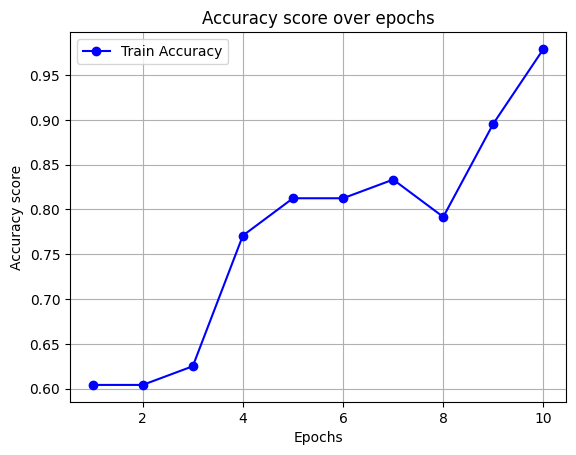

3727

In [11]:
import matplotlib.pyplot as plt
num_iterations=epochs
# Vẽ biểu đồ
# Define colors for the lines
train_color = 'blue'
plt.plot(range(1, num_iterations+1), train_accuracy,marker='o', label='Train Accuracy', color=train_color)
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Accuracy score over epochs')
plt.legend()
plt.grid(True)
plt.show()
del num_iterations
gc.collect()

# TESTING

In [12]:
print(listmodel[bestidx].config)
pickle.dump(listmodel[bestidx], open('bestmodel.sav', 'wb'))

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "transformers_version": "4.45.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [13]:
total_t0 = time.time()
# Testing
print("")
print("Testing...")
use=listmodel[bestidx]
use.eval()
total_eval_accuracy = 0
total_eval_loss = 0
y_true = []
y_pred = []
test_accuracy=[]
t0=time.time()

for batch in test_dataloader:
    input_ids = batch[0].to(device)
    input_mask = batch[1].to(device)
    labels = batch[2].to(device)
    with torch.no_grad():
        out = model(input_ids, input_mask,labels=labels)
        del input_ids,input_mask
        gc.collect()
        loss = out[0]
        logi = out.logits
        logits_tensor = torch.tensor(logi)
    loss = criterion(logits_tensor, labels)
    total_eval_loss += loss.item()
    pred = torch.argmax(logits_tensor, dim = 1)
    total_eval_accuracy += torch.sum(pred == labels).item()
    y_true.append(labels.flatten())
    y_pred.append(pred.flatten())
    del pred,logi,out,logits_tensor
    gc.collect()

avg_val_accuracy = total_eval_accuracy / len(test_dataloader.dataset)
avg_val_loss = total_eval_loss / len(test_dataloader.dataset)
print("Testing loss: {}".format(avg_val_loss))
valid_time =time.time() - t0
valid_time=format_time(valid_time)
print("Testing time:{}".format(valid_time))
y_true = torch.cat(y_true).tolist()
y_pred = torch.cat(y_pred).tolist()
test_acc=accuracy_score(y_true, y_pred)
test_accuracy.append(test_acc)
print('Accuracy score:',test_acc)
print('roc_auc score: ', roc_auc_score(y_true,y_pred))
print('Precision score:',precision_score(y_true, y_pred))
print('Recall score:',recall_score(y_true, y_pred))
print('F1 score:',f1_score(y_true, y_pred))
print()

print("Summary")
print("Total time {:} (h:mm:ss)",format_time(time.time()-total_t0))


Testing...
Testing loss: 0.0008526559104211628
Testing time:0:00:08
Accuracy score: 0.65625
roc_auc score:  0.725
Precision score: 1.0
Recall score: 0.45
F1 score: 0.6206896551724138

Summary
Total time {:} (h:mm:ss) 0:00:08


[[1.         0.47826087]
 [0.         0.52173913]]
Accuracy:  0.65625
Precision score: 1.0
Recall score: 0.45
F1-score:  0.6206896551724138


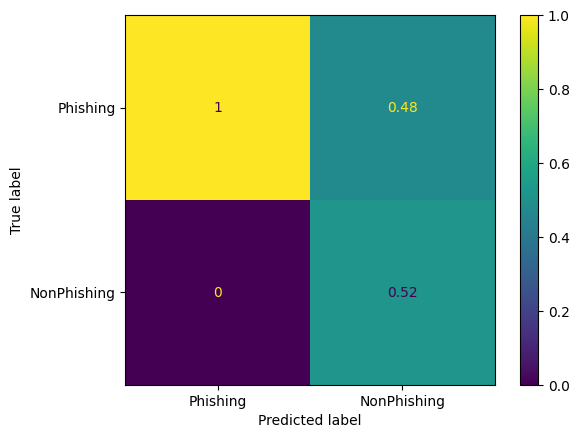

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred, labels=[1, 0], normalize='pred')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Phishing', 'NonPhishing'])
disp.plot()

print('Accuracy: ', accuracy_score(y_pred,y_true))
print('Precision score:',precision_score(y_true, y_pred))
print('Recall score:',recall_score(y_true, y_pred))
print('F1-score: ', f1_score(y_pred,y_true))

In [15]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=['NonPhishing', 'Phishing'])
print(report)

              precision    recall  f1-score   support

 NonPhishing       0.52      1.00      0.69        12
    Phishing       1.00      0.45      0.62        20

    accuracy                           0.66        32
   macro avg       0.76      0.72      0.65        32
weighted avg       0.82      0.66      0.65        32

